# Dataframe prep

In [1]:
import csv
import pandas as pd


In [2]:
gg_df = pd.read_csv('gg_final_dataframe.csv')
gg_df

,artist_id,artist_x,song_id,song_name,album_id,album,Like_Count,Lyric,date,year
0,80015705,SG워너비,80279378,Must Have Love (우리들의 겨울),20006374,SG워너비 & 브라운 아이드 걸스,"[40,450]",[함께 있단 이유로 행복했었던 \n우리들의 겨울날의 소중한 기억들\n좋은 날엔 언제...,2006-11-16,2006
1,80015705,브라운 아이드 걸스,1598921,어쩌다,20298156,My Style,"[45,790]",[* 어쩌다 어쩌다 어쩌다 \n널 사랑하게 됐는지 \n내가 왜 이꼴이 됐는지\n...,2008-09-16,2008
2,80015705,브라운 아이드 걸스,1597926,You,20298156,My Style,"[21,679]",[Yeah Yeah Yeah Yeah\n그대는 내게 바람과 같네 돌아와 Baby\n...,2008-09-16,2008
3,80015705,브라운 아이드 걸스,1775962,Abracadabra,444618,Sound G.,"[230,108]",[이러다 미쳐 내가 여리 여리 착하던 그런 내가\n너 때문에 돌아 내가 독한 나로 ...,2009-07-21,2009
4,80015705,브라운 아이드 걸스,1770201,Candy Man,444618,Sound G.,"[128,685]",[캔디처럼 달콤한 숨이 멈출듯한 미소\n몇번씩 몇번씩 무너지는거야 대체\nfanta...,2009-07-21,2009
...,...,...,...,...,...,...,...,...,...,...
1963,20164333,NewJeans,6170060,Attention,4082425,NewJeans 1st EP 'New Jeans',"[6,365]",[You and me\n내 맘이 보이지\n한참을 쳐다봐\n가까이 다가가\nYou s...,2022-08-01,2022
1964,20164333,NewJeans,6171084,Cookie,4082425,NewJeans 1st EP 'New Jeans',"[3,368]",[내가 만든 쿠키\n너를 위해 구웠지\nBut you know that it ain...,2022-08-01,2022
1965,20164333,NewJeans,6170218,Hurt,4082425,NewJeans 1st EP 'New Jeans',"[2,075]",[보고 싶은 생각에\n들어간 우리 창에\n나는 말을 거는데\n보내지는 않을래\n느린...,2022-08-01,2022
1966,20164333,NewJeans,6184997,Ditto,4078016,NewJeans 'OMG',"[4,218]",[Woo woo woo woo ooh\nWoo woo woo woo\nStay in...,2023-01-02,2023


In [3]:
# for cancelled_csv in list_csvs:
#     print(cancelled_csv)
#     specific_path = os.path.join(path_cancelled, cancelled_csv)
#     artist_dataframe = pd.read_csv(specific_path)
    
#     artist_dataframe.drop(columns = ['Unnamed: 0'], inplace = True)
#     artist_dataframe.set_index('Datetime', inplace = True)
    
#     artist_dataframe.drop(columns = ['Text', 'Username', 'cleaned_text'], inplace = True)
    
#     artist_dataframe['weighting'] = 0.1 * artist_dataframe['likes'] + artist_dataframe['retweet'] 
    
#     artist_dataframe.reset_index(inplace = True)
#     artist_dataframe['Datetime'] = pd.to_datetime(artist_dataframe['Datetime'], yearfirst = True)
#     artist_dataframe.set_index('Datetime', inplace = True)
    
#     artist_positives = artist_dataframe[(artist_dataframe['classified_sentiment'] == 'Positive') | (artist_dataframe['classified_sentiment'] == 'Extremely Positive')]
#     artist_positives.rename(columns = {'weighting':'positive_weights'}, inplace = True)
    
#     artist_positive = artist_positives.groupby('Datetime').sum()
#     artist_positive_df = pd.DataFrame(artist_positive.iloc[:,-1])
    
#     artist_negatives = artist_dataframe[(artist_dataframe['classified_sentiment'] == 'Negative') | (artist_dataframe['classified_sentiment'] == 'Extremely Negative')]
#     artist_negatives.rename(columns = {'weighting':'negative_weights'}, inplace = True)
    
#     artist_negative = artist_negatives.groupby('Datetime').sum()
#     artist_negative_df = pd.DataFrame(artist_negative.iloc[:,-1])
    
#     artist_weighted_sentiment = pd.merge(artist_positive_df, artist_negative_df, how = 'outer', left_index= True, right_index= True)
#     print(artist_weighted_sentiment)

# NLP

## basic cleaning

In [4]:
import re
import string
import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from cleantext import clean
import string
import re


manual_sw = ["n't", '내', '너의', '난', '날', '내가', '너','나', '그', '니', '걸', '거야', '수', '다', '더',
             '널', '네', '니가', '네가', '널', '너를', '넌', '내게', '이', 'l', 'u', '-',
            'na', 'ah', 'e','m', 'uh', 'eh', 's', 'la', 'a', 'o', 'ta', 't', 'oh', 'du', 'yeah', '’', 'amp']
#you, me, I, la, ta, o..etc.
#this is an old ver. stopwords befor Yuqing improved it


def clean_text(text):
    #changing to lowercase
    text = text.lower()
    
    # removing #´s 
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    
    #remove indentation
    text = re.sub(r'\n', '', text)
    
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '') 
    
    text = text.strip()
    
    #tokenizing words
    tokens = word_tokenize(text)
    
    
    filtered_words = [w for w in tokens if w not in manual_sw]
    
    return text

In [5]:
gg_df['cleaned_lyrics'] = gg_df.Lyric.apply(clean_text)

In [6]:
gg_df_2 = gg_df[['artist_x', 'song_name', 'year', 'cleaned_lyrics']]
gg_df_2

,artist_x,song_name,year,cleaned_lyrics
0,SG워너비,Must Have Love (우리들의 겨울),2006,함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 네가 ...
1,브라운 아이드 걸스,어쩌다,2008,어쩌다 어쩌다 어쩌다 널 사랑하게 됐는지 내가 왜 이꼴이 됐는지어쩌다 어쩌다 어...
2,브라운 아이드 걸스,You,2008,yeah yeah yeah yeah그대는 내게 바람과 같네 돌아와 babyfeeli...
3,브라운 아이드 걸스,Abracadabra,2009,이러다 미쳐 내가 여리 여리 착하던 그런 내가너 때문에 돌아 내가 독한 나로 변해 ...
4,브라운 아이드 걸스,Candy Man,2009,캔디처럼 달콤한 숨이 멈출듯한 미소몇번씩 몇번씩 무너지는거야 대체fantastic한...
...,...,...,...,...
1963,NewJeans,Attention,2022,you and me내 맘이 보이지한참을 쳐다봐가까이 다가가you seeyou see...
1964,NewJeans,Cookie,2022,내가 만든 쿠키너를 위해 구웠지but you know that it ain’t fo...
1965,NewJeans,Hurt,2022,보고 싶은 생각에들어간 우리 창에나는 말을 거는데보내지는 않을래느린 한마디보다조용함...
1966,NewJeans,Ditto,2023,woo woo woo woo oohwoo woo woo woostay in the ...


## by year

In [7]:
by_year = gg_df_2.groupby(['year']).sum()[['cleaned_lyrics']]
by_year

,cleaned_lyrics
year,
2006,함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 네가 ...
2007,와아 여름이다 막 이래here we go nowlt이재훈gt어떡해 올 여름 난 너무...
2008,어쩌다 어쩌다 어쩌다 널 사랑하게 됐는지 내가 왜 이꼴이 됐는지어쩌다 어쩌다 어...
2009,이러다 미쳐 내가 여리 여리 착하던 그런 내가너 때문에 돌아 내가 독한 나로 변해 ...
2010,전에 알던 내가 아냐 brand new sound새로워진 나와 함께 one more...
2011,feel watch plus sixth sense길들여질 수가 없어 나는 절대don...
2012,너의 숨소리가 귓가에 불어오는 밤식지 않은 이 여름 밤을 난 너와 함께도시 불빛이면...
2013,나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 날 보지 마요여기서 다 털어놓을까요어젯밤 ...
2014,온도가 so hot 뜨거 like a roof on fire on the rocks...


## translate relevant words into Eng

In [8]:
def kor_to_eng(text):
    #stage_1: man, boy, girl, oppa, love, like, want
    text = text.replace("사랑", "love")
    text = text.replace("좋아", "like") # like has multiple meanings, so needs to n-gram as well
    text = text.replace("키스", "kiss")
    text = text.replace("뽀뽀", "kiss")
    text = text.replace("터치", 'touch')
    text = text.replace("안아", 'hug')
#     text = text.replace("원해", "want")
#     text = text.replace("원하", "want")
# want & girl should be dealt with n-grams because the meaning is completely different 
#between English and Korean
    
    #gender-specific
    text = text.replace("남자", "man")
    text = text.replace("소녀", "so-nyeo") #young girl (少女)
    text = text.replace("여자", "woman")
    text = text.replace("소년", 'boy')
    text = text.replace("오빠", "oppa")
    text = text.replace("그의", 'him')
    text = text.replace("그에게", 'him')
    text = text.replace("그와", 'him')
    text = text.replace("그를", 'him')
    text = text.replace("그가", 'him')
    text = text.replace("그는", 'him')
    text = text.replace("놈", 'guy')
    
    #돈 (money)
      
    return text

In [9]:
by_year['trans_lyrics'] = by_year.cleaned_lyrics.apply(kor_to_eng)
by_year

,cleaned_lyrics,trans_lyrics
year,,
2006,함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 네가 ...,함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 네가 ...
2007,와아 여름이다 막 이래here we go nowlt이재훈gt어떡해 올 여름 난 너무...,와아 여름이다 막 이래here we go nowlt이재훈gt어떡해 올 여름 난 너무...
2008,어쩌다 어쩌다 어쩌다 널 사랑하게 됐는지 내가 왜 이꼴이 됐는지어쩌다 어쩌다 어...,어쩌다 어쩌다 어쩌다 널 love하게 됐는지 내가 왜 이꼴이 됐는지어쩌다 어쩌다...
2009,이러다 미쳐 내가 여리 여리 착하던 그런 내가너 때문에 돌아 내가 독한 나로 변해 ...,이러다 미쳐 내가 여리 여리 착하던 그런 내가너 때문에 돌아 내가 독한 나로 변해 ...
2010,전에 알던 내가 아냐 brand new sound새로워진 나와 함께 one more...,전에 알던 내가 아냐 brand new sound새로워진 나와 함께 one more...
2011,feel watch plus sixth sense길들여질 수가 없어 나는 절대don...,feel watch plus sixth sense길들여질 수가 없어 나는 절대don...
2012,너의 숨소리가 귓가에 불어오는 밤식지 않은 이 여름 밤을 난 너와 함께도시 불빛이면...,너의 숨소리가 귓가에 불어오는 밤식지 않은 이 여름 밤을 난 너와 함께도시 불빛이면...
2013,나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 날 보지 마요여기서 다 털어놓을까요어젯밤 ...,나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 날 보지 마요여기서 다 털어놓을까요어젯밤 ...
2014,온도가 so hot 뜨거 like a roof on fire on the rocks...,온도가 so hot 뜨거 like a roof on fire on the rocks...


## manual stopwords

In [10]:
# stop_words = list(stopwords.words('english'))

# manual_sw = ["n't", '내', '너의', '난', '날', '내가', '너','나', '그', '니', '걸', '거야', '수', '다', '더',
#              '널', '네', '니가', '네가', '널', '너를', '넌', '내게', '이', 'l', 'u', '-',
#             'na', 'ah', 'e','m', 'uh', 'eh', 's', 'la', 'a', 'o', 'ta', 't', 'oh', 'du', 'yeah', '’']
# #you, me, I, la, ta, o..etc.
# #this is an old ver. stopwords befor Yuqing improved it

# stop_words.extend(manual_sw)

# by_year['trans_lyrics'] = by_year['trans_lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in manual_sw]))
# by_year

In [11]:
def words_by_year(year):
    df_by_year = by_year.loc[year, :]
    df_2 = " ".join(cat for cat in df_by_year)
    return df_2

In [12]:
df_2006 = words_by_year(2006)
df_2007 = words_by_year(2007)
df_2008 = words_by_year(2008)
df_2009 = words_by_year(2009)
df_2010 = words_by_year(2010)
df_2011 = words_by_year(2011)
df_2012 = words_by_year(2012)
df_2013 = words_by_year(2013)
df_2014 = words_by_year(2014)
df_2015 = words_by_year(2015)
df_2016 = words_by_year(2016)
df_2017 = words_by_year(2017)
df_2018 = words_by_year(2018)
df_2019 = words_by_year(2019)
df_2020 = words_by_year(2020)
df_2021 = words_by_year(2021)
df_2022 = words_by_year(2022)
# df_2023 = words_by_year(2023)

## wordcloud


In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [14]:
def word_cloud_year(df):
    word_cloud = WordCloud(font_path='Binggrae', width = 1000, height = 300, 
    colormap='BuPu', max_words=100, collocations = False).generate(df)


    plt.figure(figsize = (10,8))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

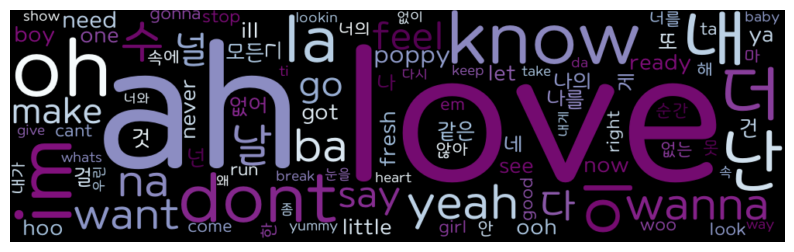

In [15]:
word_cloud_year(df_2022)

In [16]:
type(df_2022)

str

In [17]:
# wordlist = new.split()

# wordfreq = []
# for w in wordlist:
#     wordfreq.append(wordlist.count(w))
    
# def wordListToFreqDict(wordlist):
#     wordfreq = [wordlist.count(p) for p in wordlist]
#     return dict(list(zip(wordlist,wordfreq)))

# def sortFreqDict(freqdict):
#     aux = [(freqdict[key], key) for key in freqdict]
#     aux.sort()
#     aux.reverse()
#     return aux

# dictionary = wordListToFreqDict(wordlist)
# sorteddict = sortFreqDict(dictionary)

In [18]:
def word_ranking(df_year):

    wordlist = df_year.split()

    wordfreq = [wordlist.count(p) for p in wordlist]
    freqdict = dict(list(zip(wordlist,wordfreq)))

    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    
    return aux

In [19]:
word_ranking(df_2022)

KeyboardInterrupt: 

# LDA (trial)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
by_year2 = by_year['cleaned_lyrics']
by_year2

year
2006    함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 네가 ...
2007    와아 여름이다 막 이래here we go nowlt이재훈gt어떡해 올 여름 난 너무...
2008    어쩌다 어쩌다 어쩌다  널 사랑하게 됐는지  내가 왜 이꼴이 됐는지어쩌다 어쩌다 어...
2009    이러다 미쳐 내가 여리 여리 착하던 그런 내가너 때문에 돌아 내가 독한 나로 변해 ...
2010    전에 알던 내가 아냐 brand new sound새로워진 나와 함께 one more...
2011    feel watch plus sixth sense길들여질 수가 없어 나는 절대don...
2012    너의 숨소리가 귓가에 불어오는 밤식지 않은 이 여름 밤을 난 너와 함께도시 불빛이면...
2013    나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 날 보지 마요여기서 다 털어놓을까요어젯밤 ...
2014    온도가 so hot 뜨거 like a roof on fire on the rocks...
2015    comp시간이 어디선가 휘어져 버린 ground 어지러운가파란 비명소리가 내 눈을 ...
2016    지나간 계절 그 사이로 새겨진 추억그 중에도 오늘 난 널 처음 본 그날 떠올라햇살 ...
2017    hohoholiday hohoholiday hohoholiday hohoholida...
2018    im so sick of lyingyou gotta know that잘 지내 잘 지...
2019    너를 사랑하는 일은 놀라워도대체 내가 아닌 사람 같아너를 바라보다 보면 멍해져하도 ...
2020    완벽한 걸 눈코입도날 보는 차가운 표정까지i made you lovei made y...
2021    붉어진 노을 아래 떠나는 너아직 끝나지 않은 이야기야 야 야폭풍이 지나간 듯 내 가...
2022    forever 1its love its lovewere not stopping네가 ...
2023    w

In [29]:
# Vectorizing
vectorizer = TfidfVectorizer()
vectorized_documents = vectorizer.fit_transform(by_year2)
vectorized_documents = pd.DataFrame(vectorized_documents.toarray(), columns = vectorizer.get_feature_names_out())
vectorized_documents

,00근데,070뿐이네일어나자마자,0에,0원이,0이,10,100,1004,100는,100번,...,힘준,힘차게,힘척추를,힙한,힙합,힙합이,힝늦게까지,瑩嗤,ﬁrejust,２人だけのoh
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.009656,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003451,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.001818,0.002215,0.000000,0.002531,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.002531,0.000000,0.000000,0.000000,0.00000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003713,0.000000,0.003713,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,0.000000,0.000000,0.003505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [30]:
from sklearn.decomposition import LatentDirichletAllocation

In [47]:
n_components = 25
lda_model = LatentDirichletAllocation(n_components=n_components, max_iter = 100)

lda_model.fit(vectorized_documents)

LatentDirichletAllocation(max_iter=100, n_components=25)

In [48]:
document_topic_mixture = lda_model.transform(vectorized_documents)
document_topic_mixture

array([[1.64995049e-03, 1.64995049e-03, 1.64995049e-03, 1.64995050e-03,
        1.64995049e-03, 1.64995049e-03, 1.64995049e-03, 1.64995049e-03,
        1.64995049e-03, 1.64995049e-03, 1.64995049e-03, 1.64995049e-03,
        1.64995049e-03, 1.64995049e-03, 1.96878631e-01, 1.64995049e-03,
        1.64995049e-03, 1.64995049e-03, 7.65172508e-01, 1.64995049e-03,
        1.64995049e-03, 1.64995049e-03, 1.64995049e-03, 1.64995049e-03,
        1.64995049e-03],
       [1.51497652e-03, 1.51497652e-03, 1.51497652e-03, 5.51477467e-01,
        1.51497652e-03, 1.51497652e-03, 1.51497652e-03, 1.51497652e-03,
        1.51497652e-03, 1.51497653e-03, 1.51497652e-03, 1.51497652e-03,
        1.51497652e-03, 1.51497652e-03, 3.93780410e-01, 1.51497652e-03,
        1.51497652e-03, 1.51497652e-03, 2.14126399e-02, 1.51497652e-03,
        1.51497652e-03, 1.51497652e-03, 1.51497652e-03, 1.51497652e-03,
        1.51497652e-03],
       [1.81238785e-03, 1.81238785e-03, 1.81238785e-03, 1.81238786e-03,
        1.8123

In [49]:
topic_word_mixture = pd.DataFrame(lda_model.components_, columns = vectorizer.get_feature_names_out())

In [50]:
topic_word_mixture.loc[3].sort_values(ascending = False)

돼irony        0.184280
줘요            0.175539
든다            0.160234
않을껄           0.160234
떠나려           0.145239
                ...   
yah           0.040000
yaeveryday    0.040000
처음            0.040000
대로말해줘         0.040000
뒤로            0.040000
Name: 3, Length: 75401, dtype: float64

In [51]:
def print_topics(lda_model, vectorizer, top_words):
    topic_mixture = pd.DataFrame(lda_model.components_, columns = vectorizer.get_feature_names_out())
    n_components = topic_mixture.shape[0]
    for topic in range(n_components):
        print(f'for topic {topic}, the top words: {top_words}')
        topic_df = topic_mixture.iloc[topic].sort_values(ascending = False).head(top_words)
        print(round(topic_df),3)

In [52]:
print_topics(lda_model, vectorizer, 20)

for topic 0, the top words: 20
lovestop     0.0
띄네           0.0
lovela       0.0
나밖에          0.0
조용한          0.0
girlswere    0.0
기다려준         0.0
wanting      0.0
보면은          0.0
만들래하나        0.0
rooshake     0.0
girl하나       0.0
달려갈께두        0.0
둘이yes        0.0
어쩔수가         0.0
떨려모른척        0.0
달려갈께나와       0.0
변했어너만        0.0
세상들도         0.0
안길래          0.0
Name: 0, dtype: float64 3
for topic 1, the top words: 20
lovestop     0.0
띄네           0.0
lovela       0.0
나밖에          0.0
조용한          0.0
girlswere    0.0
기다려준         0.0
wanting      0.0
보면은          0.0
만들래하나        0.0
rooshake     0.0
girl하나       0.0
달려갈께두        0.0
둘이yes        0.0
어쩔수가         0.0
떨려모른척        0.0
달려갈께나와       0.0
변했어너만        0.0
세상들도         0.0
안길래          0.0
Name: 1, dtype: float64 3
for topic 2, the top words: 20
lovestop     0.0
띄네           0.0
lovela       0.0
나밖에          0.0
조용한          0.0
girlswere    0.0
기다려준         0.0
wanting      0.0
보면은          0.0
만들래하나        0.0
roosh

swan       0.0
dam        0.0
ki         0.0
chi        0.0
ting       0.0
아예         0.0
di         0.0
tickle     0.0
cash       0.0
curious    0.0
빠라빠빠       0.0
라라         0.0
merry      0.0
id         0.0
wanting    0.0
dumb       0.0
muah       0.0
cupid      0.0
이래라        0.0
링마벨        0.0
Name: 21, dtype: float64 3
for topic 22, the top words: 20
lovestop     0.0
띄네           0.0
lovela       0.0
나밖에          0.0
조용한          0.0
girlswere    0.0
기다려준         0.0
wanting      0.0
보면은          0.0
만들래하나        0.0
rooshake     0.0
girl하나       0.0
달려갈께두        0.0
둘이yes        0.0
어쩔수가         0.0
떨려모른척        0.0
달려갈께나와       0.0
변했어너만        0.0
세상들도         0.0
안길래          0.0
Name: 22, dtype: float64 3
for topic 23, the top words: 20
likelike      0.0
lo            0.0
banana        0.0
later         0.0
duper         0.0
housewhats    0.0
bum           0.0
chill         0.0
muh           0.0
vie           0.0
latersee      0.0
뿜뿜            0.0
다운            0.0
빙그르     

# frquency of a specific word (ratio)

In [ ]:
# Why boy is still so frequent? -> NEED to do N-gram etc
# Kill This Love also contains 'Love'

In [ ]:
def word_by_years(text, word):
    num_of_word = text.count(word)
    len_of_df = len(text)
    ratio = num_of_word / len_of_df *100
    return round(ratio, 3)

In [ ]:
# love like kiss touch hug 
# nyeo woman boy oppa he guy

In [ ]:
by_year['love'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "love"))
by_year['kiss'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "kiss"))
by_year['touch'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "touch"))
by_year['feel'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "feel"))
by_year['like'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "like"))
by_year['baby'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "baby"))


by_year['so-nyo'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "nyeo"))
by_year['woman'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "woman"))
by_year['he/him/his'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "him"))
by_year['guy'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "guy"))

by_year['boy'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "boy"))
by_year['man'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "man"))
by_year['oppa'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "oppa"))
by_year['want'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "wan"))

by_year['girl'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "girl"))
by_year['girls'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "girls"))

## plot

In [ ]:
keywords_df = by_year.drop(columns=['cleaned_lyrics', 'trans_lyrics']).iloc[:-1,:]
keywords_df

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pandas import DataFrame

plt.figure(figsize = (30,10))

plt.plot(keywords_df['love'], label = 'love', color = 'pink')
# plt.plot(keywords_df['kiss'], label = 'kiss')
# plt.plot(keywords_df['touch'], label = 'touch')
# plt.plot(keywords_df['like'], label = 'like')
plt.plot(keywords_df['woman'], color='red', label = 'woman')

plt.plot(keywords_df['he/him/his'], linestyle='dashed', label = 'he/him/his')
plt.plot(keywords_df['boy'], linestyle='dashed', label = 'boy')
plt.plot(keywords_df['man'], linestyle='dashed', label = 'man')

plt.plot(keywords_df['girl'], label = 'girl') #mostly related to hetero-normative term
plt.plot(keywords_df['girls'], label = 'girls') #mostly related to women empowerment(girlhood)
# plt.plot(keywords_df['so-nyo'], label = 'sonyo') - not significant
plt.plot(keywords_df['baby'], label = 'baby')
plt.plot(keywords_df['feel'], label = 'feel')
# plt.plot(keywords_df['want'], label = 'want')

plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("Keywords")
plt.show()

#### Trend analysis 
love, boy, baby -> decreasing

In [ ]:
#keywords_df.to_csv('keywords.csv')

# Interactive plotting

In [ ]:
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [ ]:
keywords_df.columns

## Make DataFrame Pipeline Interactive

In [ ]:
idf = keywords_df.interactive()

In [ ]:
idf

In [ ]:
year_slider = pn.widgets.IntSlider(name='Year slider', start = 2006, end = 2022, step = 1)
year_slider

In [ ]:
#Radio buttons

In [ ]:
yaxis_male = pn.widgets.RadioButtonGroup(
name = 'Y axis',
options = ['he/him/his', 'guy', 'boy', 'man', 'oppa', 'love'],
button_type = 'success')

In [ ]:
male_pipeline = (
idf[
    (idf.index <= year_slider)
]
)

In [ ]:
male_plot = male_pipeline.hvplot(x = 'year', y=yaxis_male, line_width=2, title = 'male keywords')
male_plot

### 'kill this love' is also considered as 'love' -> n-gram

In [ ]:
1167/1200

In [ ]:
np.cumsum()